# Perkenalan

Muhammad Bintang Ramadhan  
Data Science Batch 08  
Regression Model

Case:  
Pada Suatu hari 2018-12-28 15:30:07 Nino Sehabis pulang dari Boston University Ingin pergi ke TD Garden dengan jarak 3.4 mil untuk menyaksikan pertandingan Boston Celtics. Nino memutuskan ingin memesan taxi online, kondisi cuaca disana sebagian besar berawan.  
Nino ingin mencari tau lebih murah menggunakan taxi online Lyft atau Uber.

  
  
  
  
  
Objective:  
Untuk mencari tau harga mana yang lebih murah untuk memecahkan kasus Nino diatas, saya akan menggunakan Machine Learning dengan Model LinearRegression untuk memprediksi harga yang paling murah diantara Lyft dan Uber dalam Kasus Nino diatas.

# Import Library

In [1]:
import warnings
warnings.simplefilter("ignore")

import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Modelling
from sklearn.linear_model import LinearRegression

#Evaluasi Model
from sklearn import metrics
from sklearn.model_selection import cross_val_score

# Import Data

In [2]:
# Saya menggunakan dataset rideshare dari kaggle yang berisi data-data dari Taxi Online Uber dan Lyft
df_ori = pd.read_csv('rideshare_kaggle.csv') #load data
pd.set_option('display.max_columns', None) #melihat data dengan semua kolom
df = df_ori.copy() #Duplikasi data
df.head(3) #melihat data teratas

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000


# EDA

In [3]:
#Melihat Type Data, Fitur-fitur dan Jumlah Rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

-   Terdapat 57 Column dengan Tipe data Float, int dan object.  
-   Terdapat 693071 Data/Rows.
-   Terdapat Missing Value pada Fitur 'Price'

In [4]:
#Mengecek Jumlah dan berapa persen Missing Value di Fitur 'Price' 
mis = df.isnull().sum() #Jumlah Missing Value
misperc = df.isnull().sum() /693071 *100 #Berapa persen Missing Value
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(misperc)}) #Julah Missing Value dan Berapa persen Missing Value kedalam sebuah DataFrame
misval[misval['Missing Value'] > 0] #Hanya menampilkan yang memiliki Missing Value 

,Missing Value,Missing Value %
price,55095,8.0


-   Pada Fitur Price terdapat 55095 Missing Value atau 8% Missing Value

In [5]:
#Mencari tau penyebab Missing Value terhadap Price
df[df.price.isnull()].head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
18,fa5fb705-03a0-4eb9-82d9-7fe80872f754,1.543674e+09,14,1,12,2018-12-01 14:13:04,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.11,1.0,42.3647,-71.0542,36.99,32.27,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.68,5.87,6.26,1543672800,9.910,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-day,27.53,1022.32,344,0.44,1,9.910,280.1,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
31,eee70d94-6706-4b95-a8ce-0e34f0fa8f37,1.543795e+09,23,2,12,2018-12-02 23:52:56,America/New_York,Beacon Hill,South Station,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.48,1.0,42.3588,-71.0707,48.83,48.83,Overcast,Light rain until evening.,0.0,0.0,0.96,2.83,2.98,1543755600,7.790,50.73,1543788000,44.99,1543816800,50.06,1543788000,45.64,1543816800,cloudy,47.81,1002.81,275,1.00,0,7.790,287.3,1543751797,1543785238,0.86,0.0904,1543770000,36.45,1543726800,50.73,1543788000,35.85,1543748400,50.06,1543788000
40,7f47ff53-7cf2-4a6a-8049-83c90e042593,1.543524e+09,20,29,11,2018-11-29 20:38:05,America/New_York,North Station,Fenway,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.94,1.0,42.3661,-71.0631,42.50,36.47,Partly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.54,10.68,17.15,1543514400,9.772,44.66,1543510800,28.68,1543575600,38.30,1543510800,27.26,1543568400,partly-cloudy-day,26.84,1008.44,314,0.35,0,9.772,307.4,1543492404,1543526094,0.75,0.0000,1543510800,35.15,1543550400,44.66,1543510800,30.98,1543550400,38.30,1543510800
60,43abdbe4-ab9e-4f39-afdc-31cfa375dc25,1.544732e+09,20,13,12,2018-12-13 20:10:16,America/New_York,North End,West End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.16,1.0,42.3647,-71.0542,33.15,30.60,Mostly Cloudy,Partly cloudy throughout the day.,0.0,0.0,0.57,3.02,3.02,1544738400,9.956,33.83,1544731200,27.27,1544781600,32.85,1544734800,24.61,1544785200,partly-cloudy-day,19.51,1033.96,96,0.81,0,9.956,330.1,1544702792,1544735599,0.21,0.0001,1544716800,18.29,1544688000,33.83,1544731200,13.79,1544688000,32.85,1544734800
69,80db1c49-9d51-4575-a4f4-1ec23b4d3e31,1.543583e+09,13,30,11,2018-11-30 13:08:03,America/New_York,North End,Beacon Hill,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,2.67,1.0,42.3647,-71.0542,31.80,31.80,Clear,Mostly cloudy throughout the day.,0.0,0.0,0.83,2.10,4.79,1543554000,10.000,42.52,1543600800,31.71,1543658400,40.53,1543611600,28.06,1543658400,clear-day,27.14,1017.01,296,0.01,0,10.000,277.1,1543578867,1543612470,0.79,0.0003,1543593600,28.79,1543579200,42.52,1543600800,26.41,1543575600,40.53,1543611600


-   Dari hasil identifikasi kenapa fitur 'Price' memiliki Missing Value, saya memiliki kejanggalan terhadap 'cab_type' Uber dengan 'name' Taxi. Selanjutnya saya akan mengecek Uber Taxi.

In [6]:
df[df.name == 'Taxi'].count()

id                             55095
timestamp                      55095
hour                           55095
day                            55095
month                          55095
datetime                       55095
timezone                       55095
source                         55095
destination                    55095
cab_type                       55095
product_id                     55095
name                           55095
price                              0
distance                       55095
surge_multiplier               55095
latitude                       55095
longitude                      55095
temperature                    55095
apparentTemperature            55095
short_summary                  55095
long_summary                   55095
precipIntensity                55095
precipProbability              55095
humidity                       55095
windSpeed                      55095
windGust                       55095
windGustTime                   55095
v

-   Dapat dipastikan Bahwa Missing Value tersebut berasal dari Uber Taxi yang memiliki jumlah 55095.
-   Karena fitur 'Price' adalah fitur Target, jadi untuk melakukan Handling Missing Value dengan melakukan Drop Data tersebut.

In [7]:
#Mengecek persebaran Data
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

## Visualisasi

In [8]:
 #Function 3 plot
 def dfplot(plot,x1,y1,x2,y2,x3,y3): #untuk mendefinisikan tiap plot menggunakan fitur apa saja
    plt.rcParams['figure.figsize'] = (25,8) #Ukuran seluruh Plot dalam 3 plot

    #plot1
    plt.subplot(1,3,1) 
    plot(x1,y1, color='red')

    #plot2
    plt.subplot(1,3,2)
    plot(x2,y2, color='blue')
    
    #plot3
    plt.subplot(1,3,3)
    plot(x3,y3, color='green')

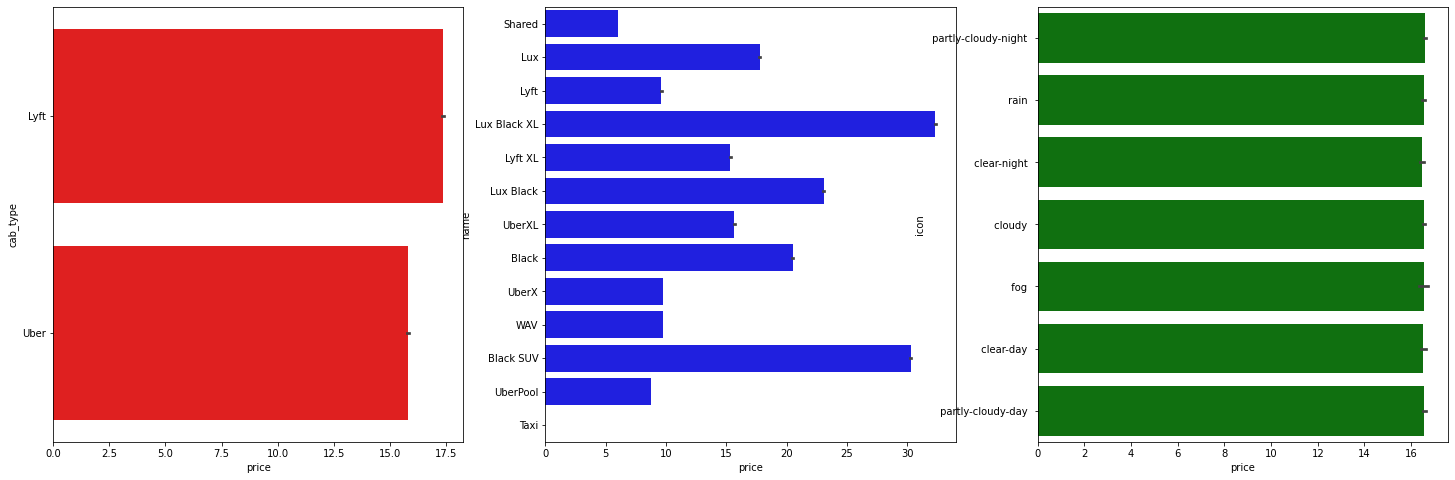

In [9]:
dfplot(sns.barplot,df['price'],df['cab_type'],df['price'],df['name'],df['price'],df['icon'])

-   Lyft memiliki price tertinggi daripada uber karena pada Lyft memberlakukan sistem Surge_multiplier yang bisa menaikan tarif.
-   name mewakili jenis-jenis tipe kendaraan dari uber dan lyft.
    -   Untuk kelas mobil mewah SUV, Lyft Lux Black XL mendapat harga tertinggi daripada Uber Black SUV.
    -   Harga terendah pada lyft Shared diatasnya ada UberPool, Sangat masuk akal kenapa keduanya terendah karna memiliki sistem menumpang kepada driver dengan arah tujuan yang sama.
-   Fitur Icon (cuaca saat itu) tidak ada perbedaan. 

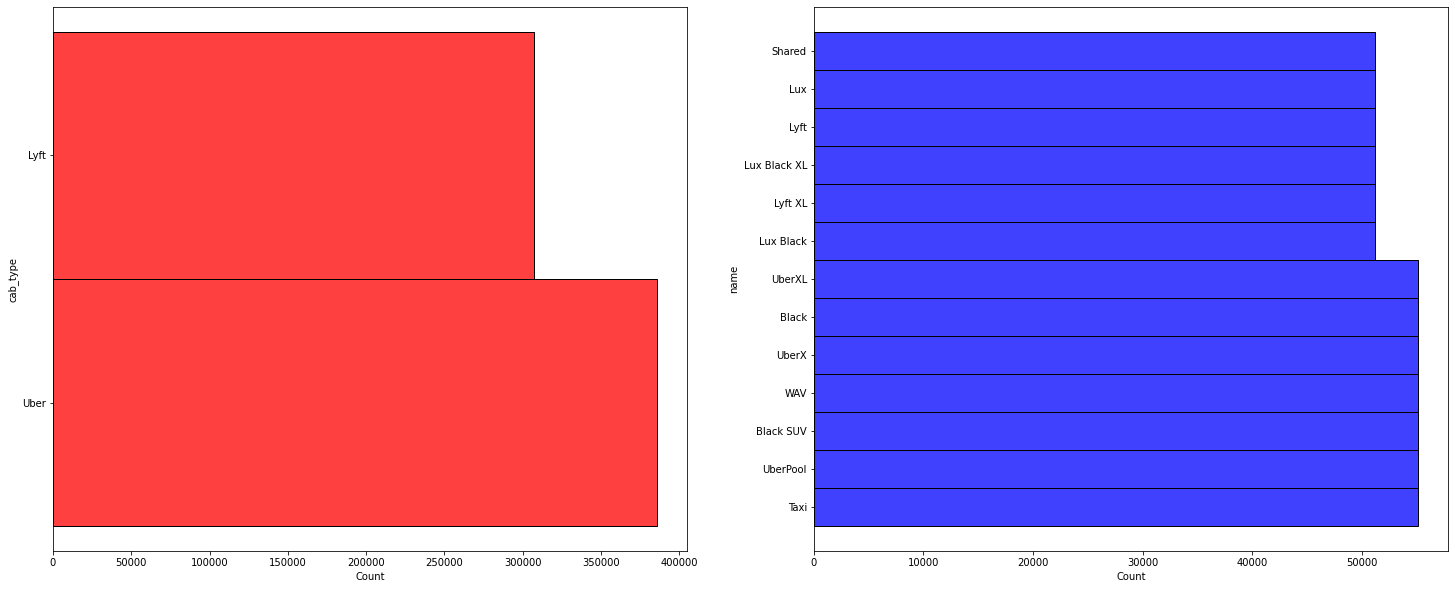

In [10]:
#Melihat Jumlah terbanyak antara Lyft dan Uber
plt.rcParams['figure.figsize'] = (25,10) #Ukuran Plot

#plot 1
plt.subplot(1,2,1)
sns.histplot(data=df, y=df['cab_type'], color='red') #Melihat jumlah lyft dan uber

#plot 2
plt.subplot(1,2,2)
sns.histplot(data=df, y=df['name'], color='blue') #Melihat Jumlah jenis-jenis kendaraan

plt.show()

In [11]:
def hist3(data, x1, x2, x3, hue): #Membuat function histogram 3 subplot
    plt.rcParams['figure.figsize'] = (25,10)

    plt.subplot(1,3,1)
    sns.histplot(data=data, x=x1, color='red', hue=hue, multiple='dodge')

    plt.subplot(1,3,2)
    sns.histplot(data=data, x=x2, color='blue', hue=hue, multiple='dodge')

    plt.subplot(1,3,3)
    sns.histplot(data=data, x=x3, color='green', hue=hue, multiple='dodge')

def hist2(data, x1, x2, hue): #Membuat function histogram 2 sublpot
    plt.rcParams['figure.figsize'] = (25,15)

    plt.subplot(1,2,1)
    sns.histplot(data=data, y=x1, color='red', hue=hue, multiple='dodge')

    plt.subplot(1,2,2)
    sns.histplot(data=data, y=x2, color='blue', hue=hue, multiple='dodge')


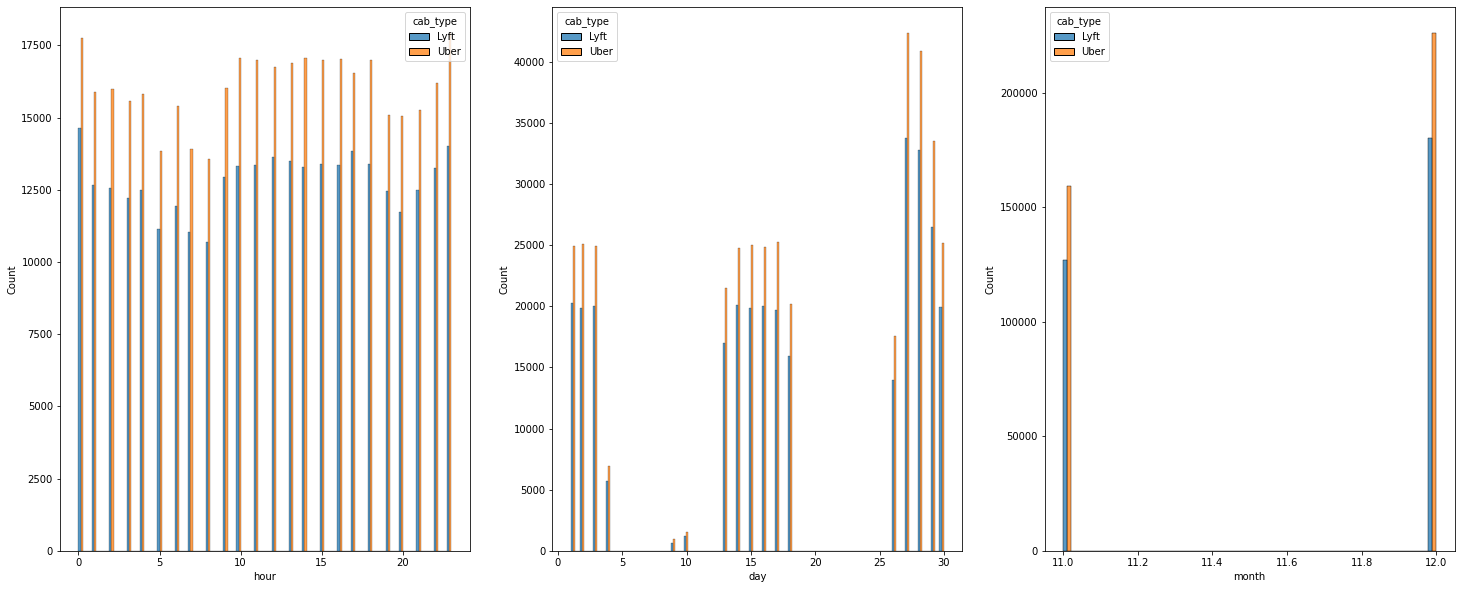

In [12]:
#Melihat perbandingan Jumlah Orderan pada Lyft dan Uber dalam Hour, Day dan Month
hist3(df, df['hour'], df['day'], df['month'], df['cab_type'])

-   Orderan/transaksi pada tiap Hour, tiap Day dan tiap Month Uber lebih banyak mendapat orderan/transaksi daripada lyft

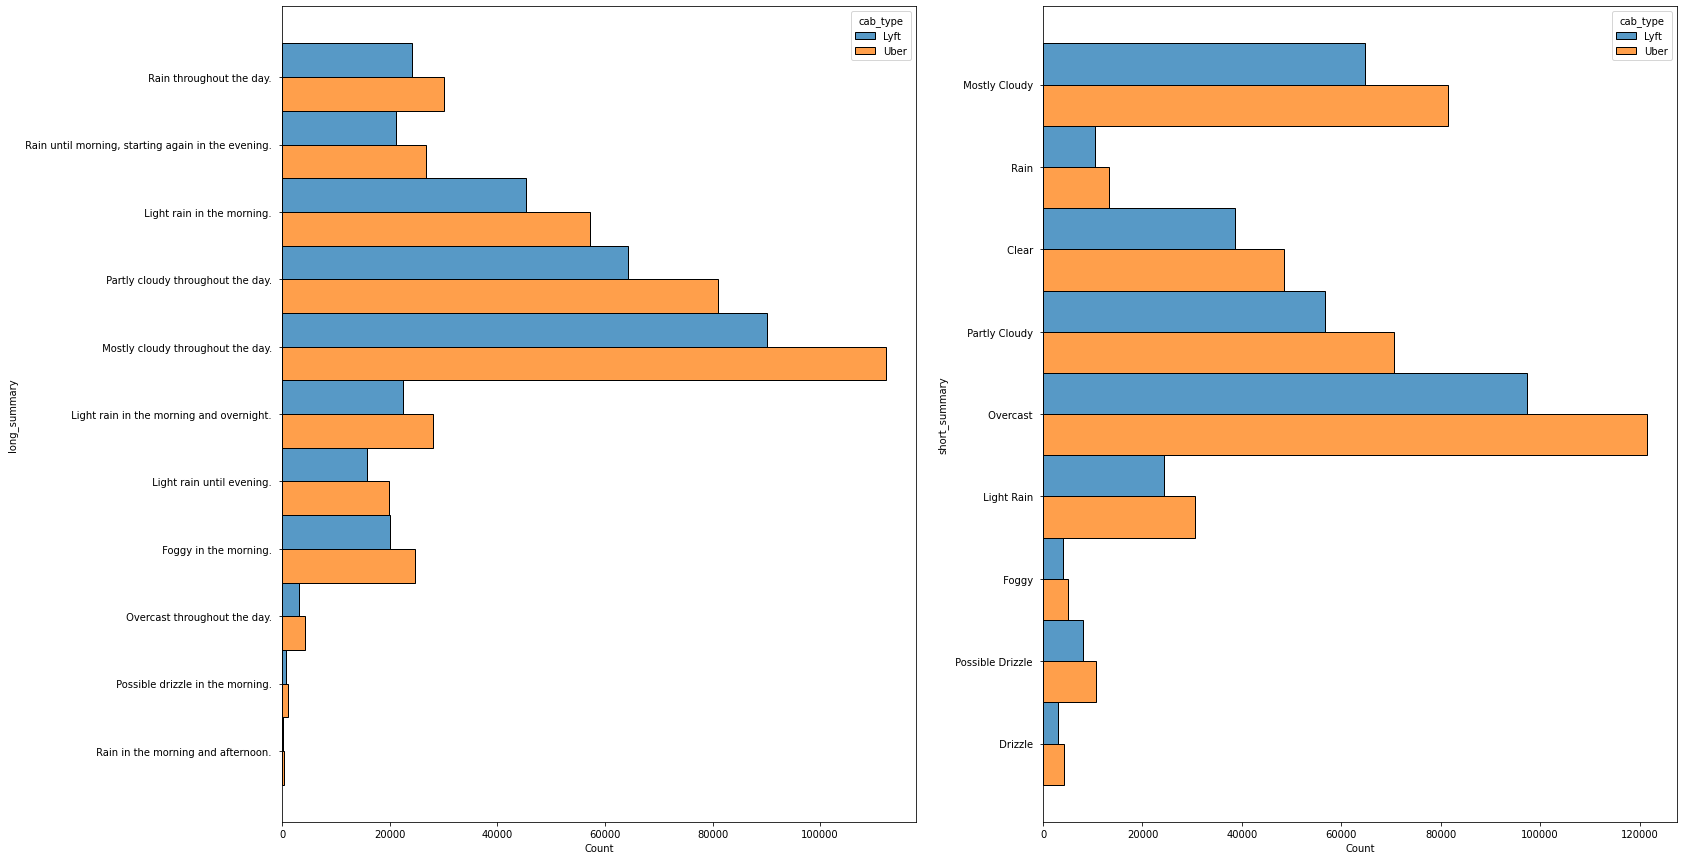

In [13]:
hist2(df, df['long_summary'], df['short_summary'], df['cab_type'])

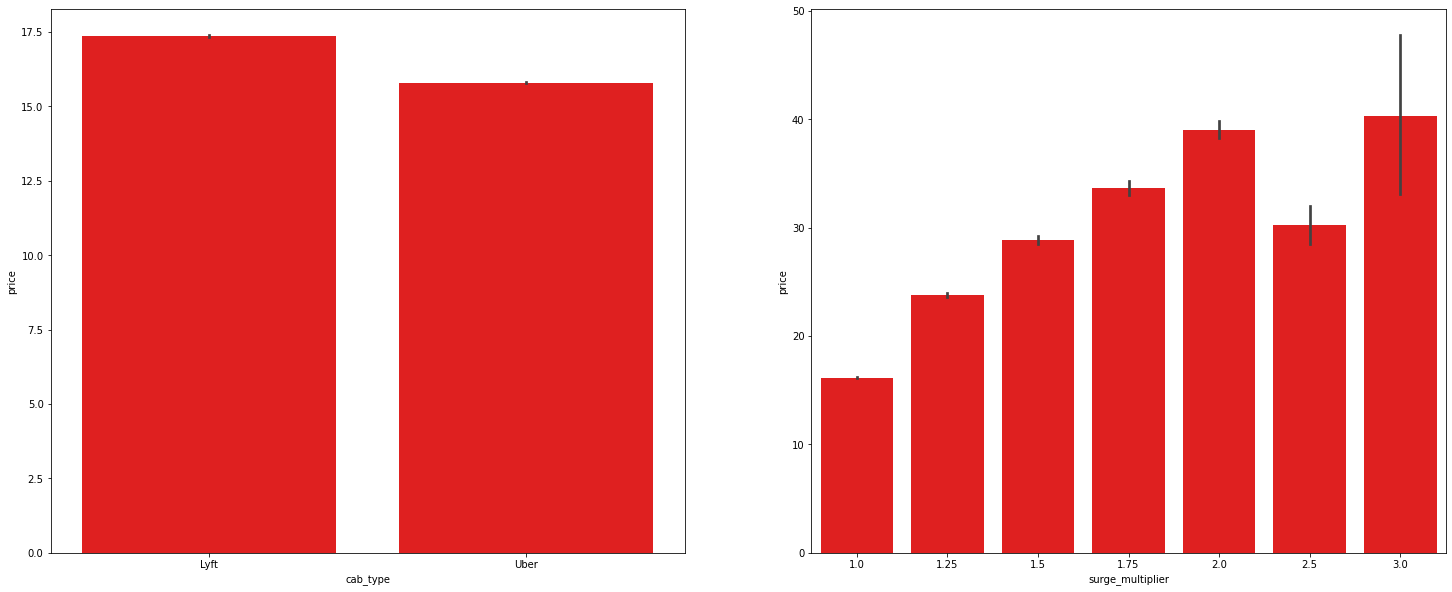

In [14]:
plt.rcParams['figure.figsize'] = (25,10)

plt.subplot(1,2,1)
sns.barplot(data=df, x=df['cab_type'], y=df['price'], color='red')

plt.subplot(1,2,2)
sns.barplot(data=df, x=df['surge_multiplier'], y=df['price'], color='red')

plt.show()

-   Dapat dilihat bahwa Lyft bisa mencapai Price tertinggi dikarenakan Lyft menggunakan System Surge_multiplier yang membuat harga melonjak jika permintaan banyak tetapi Driver tidak bisa memenuhi semua permintaan tersebut.
-   Semakin surge_multiplier meningkat maka semakin meningkat juga Price atau tarif yang didapat customer.

# Data Preprocessing

## Get Data Inference

In [15]:
#Mengambil sepuluh data dari dataset untuk dijadikan data inference
inf = df.sample(10, random_state=40)
inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
440790,002da21f-1044-4fa0-9acb-f4f3ae733f59,1.543769e+09,16,2,12,2018-12-02 16:38:04,America/New_York,West End,Fenway,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,6.5,2.84,1.0,42.2148,-71.0330,46.52,43.15,Light Rain,Rain throughout the day.,0.0255,1.0,0.94,6.69,6.69,1543755600,2.121,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.25,1543824000,rain,45.01,1010.97,120,1.00,1,2.121,277.6,1543751761,1543785256,0.86,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
485427,fbcd002b-5fc5-46a2-9337-920067f07d50,1.543406e+09,11,28,11,2018-11-28 11:50:07,America/New_York,Theatre District,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.5,1.57,1.0,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60,1543489200,36.57,1543438800,32.12,1543478400,partly-cloudy-night,27.87,991.07,270,0.76,0,9.933,345.8,1543405936,1543439716,0.72,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
601883,c5f0b7e9-fe1b-4331-93dd-f96a39c6991c,1.543511e+09,17,29,11,2018-11-29 17:02:56,America/New_York,Fenway,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.5,2.03,1.0,42.3429,-71.1003,43.91,38.03,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.50,11.24,22.48,1543514400,9.973,45.03,1543510800,28.42,1543579200,38.93,1543510800,29.07,1543579200,partly-cloudy-day,26.27,1006.58,312,0.31,1,9.973,314.0,1543492409,1543526107,0.75,0.0000,1543510800,34.83,1543550400,45.03,1543510800,30.90,1543550400,38.93,1543510800
88553,d5d3e674-2a46-4c40-8181-0b6fe6e088df,1.543484e+09,9,29,11,2018-11-29 09:32:58,America/New_York,Haymarket Square,Beacon Hill,Lyft,lyft_plus,Lyft XL,10.5,1.40,1.0,42.2148,-71.0330,37.79,30.62,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.67,10.63,11.40,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,partly-cloudy-night,27.63,1001.97,306,0.53,0,10.000,341.9,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
243796,d17c10ed-5835-4720-b65c-d5832ebe147f,1.543663e+09,11,1,12,2018-12-01 11:13:01,America/New_York,Fenway,Beacon Hill,Lyft,lyft_premier,Lux,16.5,2.40,1.0,42.3647,-71.0542,32.31,28.18,Mostly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.79,4.24,4.75,1543672800,9.850,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-night,26.59,1021.74,320,0.67,0,9.850,281.4,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
210285,79adc421-93b7-4579-b90c-5b81e562dc44,1.544810e+09,17,14,12,2018-12-14 17:55:05,America/New_York,Fenway,Back Bay,Lyft,lyft_plus,Lyft XL,10.5,1.45,1.0,42.3503,-71.0810,44.89,43.20,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.54,3.73,3.73,1544846400,9.962,46.68,1544814000,40.90,1544832000,43.98,1544817600,38.85,1544835600,partly-cloudy-day,29.03,1030.83,167,0.16,1,9.962,289.1,1544789240,1544822019,0.24,0.0000,1544806800,26.93,1544788800,46.68,1544814000,27.58,1544788800,43.98,1544817600
354553,c8bf3894-1515-4441-b62d-0f868c9df46e,1.544988e+09,19,16,12,2018

In [16]:
# Menghapus data Inference dari dalam dataset
df_train_test = df.drop(inf.index)
df_train_test.tail()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a,Taxi,NaN,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,6d318bcc-22a3-4af6-bddd-b409bfce1546,Black SUV,27.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693070,e7fdc087-fe86-40a5-a3c3-3b2a8badcbda,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,10.0,1.0,1.0,42.3519,-71.0643,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [17]:
# Reset Index untuk Data_train_test dan data for inference
df_train_test.reset_index(drop=True, inplace=True)
inf.reset_index(drop=True, inplace=True)

In [18]:
inf

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,002da21f-1044-4fa0-9acb-f4f3ae733f59,1.543769e+09,16,2,12,2018-12-02 16:38:04,America/New_York,West End,Fenway,Uber,997acbb5-e102-41e1-b155-9df7de0a73f2,UberPool,6.5,2.84,1.0,42.2148,-71.0330,46.52,43.15,Light Rain,Rain throughout the day.,0.0255,1.0,0.94,6.69,6.69,1543755600,2.121,52.86,1543788000,46.60,1543824000,52.19,1543788000,47.25,1543824000,rain,45.01,1010.97,120,1.00,1,2.121,277.6,1543751761,1543785256,0.86,0.1055,1543770000,36.35,1543726800,52.86,1543788000,35.33,1543744800,52.19,1543788000
1,fbcd002b-5fc5-46a2-9337-920067f07d50,1.543406e+09,11,28,11,2018-11-28 11:50:07,America/New_York,Theatre District,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.5,1.57,1.0,42.3647,-71.0542,35.54,30.98,Mostly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.73,5.31,7.20,1543431600,9.933,42.61,1543438800,37.60,1543489200,36.57,1543438800,32.12,1543478400,partly-cloudy-night,27.87,991.07,270,0.76,0,9.933,345.8,1543405936,1543439716,0.72,0.0000,1543420800,33.85,1543399200,42.61,1543438800,30.03,1543399200,36.57,1543438800
2,c5f0b7e9-fe1b-4331-93dd-f96a39c6991c,1.543511e+09,17,29,11,2018-11-29 17:02:56,America/New_York,Fenway,West End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.5,2.03,1.0,42.3429,-71.1003,43.91,38.03,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.50,11.24,22.48,1543514400,9.973,45.03,1543510800,28.42,1543579200,38.93,1543510800,29.07,1543579200,partly-cloudy-day,26.27,1006.58,312,0.31,1,9.973,314.0,1543492409,1543526107,0.75,0.0000,1543510800,34.83,1543550400,45.03,1543510800,30.90,1543550400,38.93,1543510800
3,d5d3e674-2a46-4c40-8181-0b6fe6e088df,1.543484e+09,9,29,11,2018-11-29 09:32:58,America/New_York,Haymarket Square,Beacon Hill,Lyft,lyft_plus,Lyft XL,10.5,1.40,1.0,42.2148,-71.0330,37.79,30.62,Mostly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.67,10.63,11.40,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,partly-cloudy-night,27.63,1001.97,306,0.53,0,10.000,341.9,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,d17c10ed-5835-4720-b65c-d5832ebe147f,1.543663e+09,11,1,12,2018-12-01 11:13:01,America/New_York,Fenway,Beacon Hill,Lyft,lyft_premier,Lux,16.5,2.40,1.0,42.3647,-71.0542,32.31,28.18,Mostly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.79,4.24,4.75,1543672800,9.850,44.66,1543690800,35.04,1543712400,43.99,1543690800,35.69,1543712400,partly-cloudy-night,26.59,1021.74,320,0.67,0,9.850,281.4,1543665331,1543698851,0.82,0.0000,1543683600,31.71,1543658400,44.66,1543690800,28.06,1543658400,43.99,1543690800
5,79adc421-93b7-4579-b90c-5b81e562dc44,1.544810e+09,17,14,12,2018-12-14 17:55:05,America/New_York,Fenway,Back Bay,Lyft,lyft_plus,Lyft XL,10.5,1.45,1.0,42.3503,-71.0810,44.89,43.20,Partly Cloudy,Partly cloudy throughout the day.,0.0000,0.0,0.54,3.73,3.73,1544846400,9.962,46.68,1544814000,40.90,1544832000,43.98,1544817600,38.85,1544835600,partly-cloudy-day,29.03,1030.83,167,0.16,1,9.962,289.1,1544789240,1544822019,0.24,0.0000,1544806800,26.93,1544788800,46.68,1544814000,27.58,1544788800,43.98,1544817600
6,c8bf3894-1515-4441-b62d-0f868c9df46e,1.544988e+09,19,16,12,2018-12-16 19:15:07,America/New_York,N

## Feature Selection

Text(0.5, 1.0, 'Heatmap Korelasi')

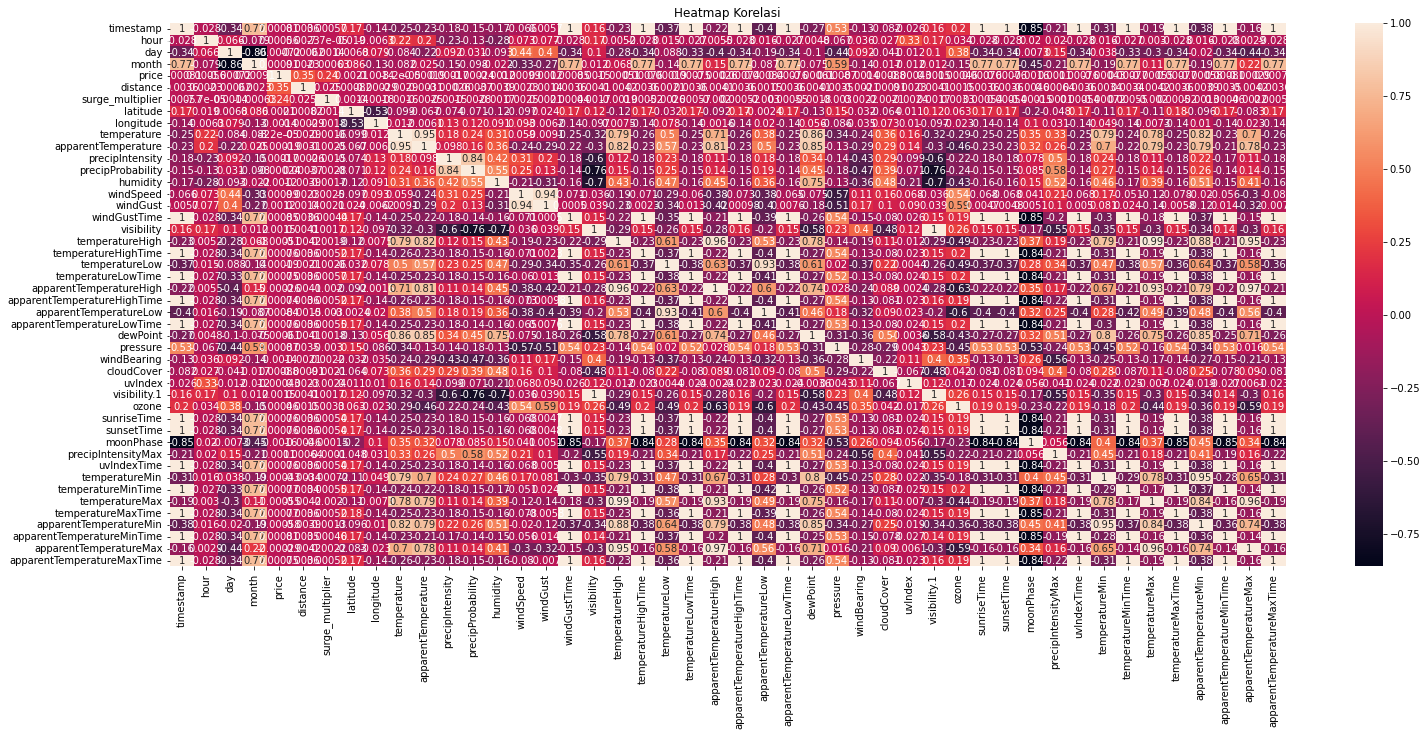

In [19]:
plt.figure(figsize=(25,10)) #Ukuran Plot
sns.heatmap(df_train_test.corr(), annot=True) #Menampilkan korelasi dari df_train_test, yang saya fokuskan korelasi terhadap fitur 'Price'
plt.title('Heatmap Korelasi') #Title plot

In [20]:
#Karna dalam heatmap kurang jelas, maka saya akan melihat korelasi terhadap price nya saja.
df_train_test.corr()['price'].round(2)

timestamp                      0.00
hour                           0.00
day                           -0.00
month                          0.00
price                          1.00
distance                       0.35
surge_multiplier               0.24
latitude                       0.00
longitude                     -0.00
temperature                   -0.00
apparentTemperature           -0.00
precipIntensity                0.00
precipProbability             -0.00
humidity                      -0.00
windSpeed                      0.00
windGust                       0.00
windGustTime                   0.00
visibility                     0.00
temperatureHigh               -0.00
temperatureHighTime            0.00
temperatureLow                 0.00
temperatureLowTime             0.00
apparentTemperatureHigh       -0.00
apparentTemperatureHighTime    0.00
apparentTemperatureLow         0.00
apparentTemperatureLowTime     0.00
dewPoint                      -0.00
pressure                    

In [21]:
df_train_test['surge_multiplier'].unique()

array([1.  , 1.25, 2.5 , 2.  , 1.75, 1.5 , 3.  ])

In [22]:
#Mengecek nilai unique dari setiap fitur categorical
print('short_summary : ', df_train_test['short_summary'].unique())
print('long_summary : ', df_train_test['long_summary'].unique())
print('icon : ', df_train_test['icon'].unique())
print()
print('cab_type : ', df_train_test['cab_type'].unique())
print('product_id : ', df_train_test['product_id'].unique())
print('name : ', df_train_test['name'].unique())

short_summary :  [' Mostly Cloudy ' ' Rain ' ' Clear ' ' Partly Cloudy ' ' Overcast '
 ' Light Rain ' ' Foggy ' ' Possible Drizzle ' ' Drizzle ']
long_summary :  [' Rain throughout the day. '
 ' Rain until morning, starting again in the evening. '
 ' Light rain in the morning. ' ' Partly cloudy throughout the day. '
 ' Mostly cloudy throughout the day. '
 ' Light rain in the morning and overnight. '
 ' Light rain until evening. ' ' Foggy in the morning. '
 ' Overcast throughout the day. ' ' Possible drizzle in the morning. '
 ' Rain in the morning and afternoon. ']
icon :  [' partly-cloudy-night ' ' rain ' ' clear-night ' ' cloudy ' ' fog '
 ' clear-day ' ' partly-cloudy-day ']

cab_type :  ['Lyft' 'Uber']
product_id :  ['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546

Fitur Numerical  

Korelasi dari setiap fitur numerik sangat kecil terhadaap fitur target 'price'.  
-   fitur 'distance' yang memiliki korelasi sangat tinggi, itu sangat masuk akal 'distance' berpengaruh terhadap 'price' dalam penggunaan jasa taxi online Uber.  
-   fitur 'surge_multiplier' memiliki korelasi tinggi terhadapa fitur target 'price', fitur ini juga sangat masuk akal jika berpengaruh terhadap 'price' karena fitur ini merupakan parameter jika sebuah kondisi saat pesanan permintaan customer banyak tetapi driver tidak mencukupi untuk memenuhi permintaan tersebut, bisa berdasarkan cuaca buruk, jam sibuk dan di sebuah acara khusus yang menyebabkan sejumlah besar orang melakukan permintaan taxi online sekaligus, Tetapi 'surge multiplier' hanya berlaku pada taxi online Lyft, sedangkan Uber tidak menggunakan sistem seperti ini. Di keduanya memiliki nilai default 1.  
  
Jadi, untuk fitur numerical yang akan saya gunakan adalah 'distance' dan 'surge multiplier' untuk Variable dependent dan 'price' untuk variable independent  
  
    

Fitur Categorical
-   'name' cukup merangkum dari 'product_id' sehingga 'product_id' tidak perlu digunakan.
-   'source' dan 'destination' menurut saya tidak terlalu berpengaruh dan sudah terangkum dalam distance. 
-   'short_summary' dan 'long_summary' menurut saya terwakilkan oleh fitur 'icon'.  
  
Saya hanya akan menggunakan 'cab_type', 'name' dan 'icon'.



In [23]:
# Membuat dataframe yang telah dilakukan Feature Selection
df_select = df_train_test[['distance', 'surge_multiplier', 'cab_type', 'name', 'icon', 'price']]
df_select

,distance,surge_multiplier,cab_type,name,icon,price
0,0.44,1.0,Lyft,Shared,partly-cloudy-night,5.0
1,0.44,1.0,Lyft,Lux,rain,11.0
2,0.44,1.0,Lyft,Lyft,clear-night,7.0
3,0.44,1.0,Lyft,Lux Black XL,clear-night,26.0
4,0.44,1.0,Lyft,Lyft XL,partly-cloudy-night,9.0
...,...,...,...,...,...,...
693056,1.00,1.0,Uber,UberXL,partly-cloudy-night,13.0
693057,1.00,1.0,Uber,UberX,partly-cloudy-night,9.5
693058,1.00,1.0,Uber,Taxi,partly-cloudy-night,NaN
693059,1.00,1.0,Uber,Black SUV,partly-cloudy-night,27.0


## Train Test Split

In [24]:
# Splitting Dataset menggunakan sklearn train_test_split
# Membagi untuk data train 80% dan test 20%
from sklearn.model_selection import train_test_split

train, test = train_test_split(df_select, test_size=0.2, random_state=8)

print(train.shape)
print(test.shape)

(554448, 6)
(138613, 6)


## Handling Missing Value

Setelah dilakukan Feature Selection, bahwa fitur 'price' memiliki Missing Value sebanyak 55091 atau	8% dari total baris data.  
Sebelum melakukan handling Missing Value mari kita litat Distribusi Data 'price' untuk mengetahui apa yang akan digunakan dalam melakukan handling Missing Value

In [25]:
mis = df_select.isnull().sum()
perc = df_select.isnull().sum() /693071 *100
misval = pd.DataFrame({'Missing Value' :mis,'Missing Value %': round(perc)})
misval[misval['Missing Value'] > 0]

,Missing Value,Missing Value %
price,55095,8.0


In [26]:
#Melihat Missing Value yang telah dibagi kedalam y_train dan y_test
print(train['price'].isnull().sum())
print(test['price'].isnull().sum())

44233
10862


Karena Missing Value terdapat pada Target, maka akan dilakukan Drop.

In [27]:
train.dropna(inplace=True)
print(train['price'].isnull().sum())

test.dropna(inplace=True)
print(test['price'].isnull().sum())

0
0


In [28]:
train[train.name == 'Taxi']

,distance,surge_multiplier,cab_type,name,icon,price


## Handling Outliers

Handling Outliers hanya dilakukan terhadap X_train saja.

#### Identifikasi Outliers

In [29]:
#function histplot dan boxplot untuk melihat distribusi data
def identify_plots(df, variable):
    plt.figure(figsize=(16, 4))

    # Plot 1 Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Plot 2 Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

In [30]:
train.shape

(510215, 6)

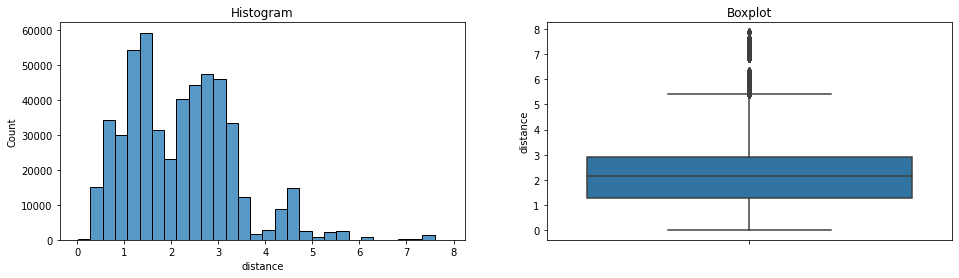

Nilai Skew :  0.8177333582071571
Nilai Skew % :  0.0



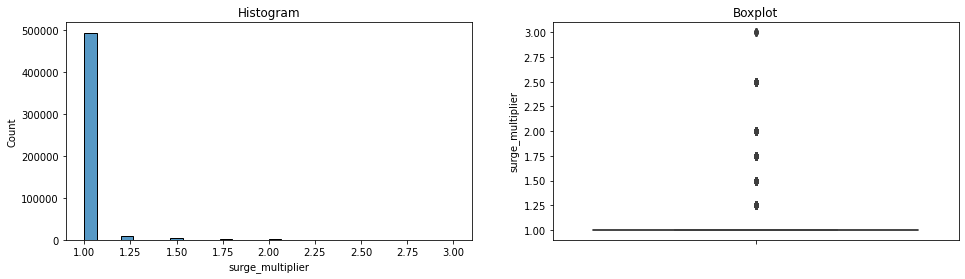

Nilai Skew :  7.954189371844111
Nilai Skew % :  0.0



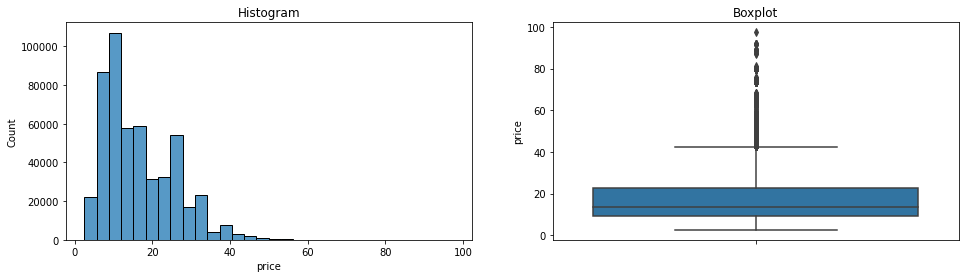

Nilai Skew :  1.0491815891887928
Nilai Skew % :  0.0



In [31]:
for var in train.select_dtypes(np.number): #Looping semua data dtrain Numerik
    identify_plots(train, var)
    print('Nilai Skew : ', train[var].skew()) #Nilai skewness dari tiap data numerik 
    print('Nilai Skew % : ',round(train[var].skew() /554448 *100, 2)) #Nilai skewness(%) dari tiap data numerik 
    print()

Dari hasil Identifikasi diatas, bahwa keduanya memiliki distribusi data Skewness, maka akan dilakukan Outliers Detection menggukanan IQR.  
  
-   Untuk price tidak dilakukan handling outliers karna akan dijadikan Target

#### Outliers Detection

In [32]:
#Membuat function untuk menemukan batas atas dan batas bawah menggunakan IQR
def find_skewed_boundaries(df, variable, distance):
    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25) #IQR = Q3 - Q1

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance) #batas bawah
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance) #batas atas

    return upper_boundary, lower_boundary

Melihat Jumlah Batas atas dan batas bawah fitur normal

In [33]:
# Melihat batas atas dan batas bawah variable distance
distance_upper_boundary, distance_lower_boundary = find_skewed_boundaries(train, 'distance', 1.5)
distance_upper_boundary, distance_lower_boundary

(5.405, -1.195)

In [34]:
# Melihat jumlah dan percent data outliers variable distance
print('Jumlah data distance diatas 5.4   : {}'.format(len(train[train['distance'] > distance_upper_boundary])))
print('% Jumlah data distance diatas 5.4 : {}'.format(len(train[train['distance'] > distance_upper_boundary])/len(train) * 100))

Jumlah data distance diatas 5.4   : 5781
% Jumlah data distance diatas 5.4 : 1.1330517526924924


Setelah dilakukan deteksi outliers terhadap variable distance, hanya ada 6626 data outliers atau 1.2% data outliers.  
Karna Outlier dibawah 5% maka penanganan Ouliers akan dilakukan Trimming.

In [35]:
# Melihat batas atas dan batas bawah variable surge_multiplier
surge_upper_boundary, surge_lower_boundary = find_skewed_boundaries(train, 'surge_multiplier', 3)
surge_upper_boundary, surge_lower_boundary

(1.0, 1.0)

In [36]:
# Melihat jumlah dan percent data outliers variable surge_multiplier

print('Jumlah data surge_multiplier diatas 1  : {}'.format(len(train[train['surge_multiplier'] > surge_upper_boundary])))
print('% Jumlah data surge_multiplier diatas 1: {}'.format(len(train[train['surge_multiplier'] > surge_upper_boundary])/len(train) * 100))

Jumlah data surge_multiplier diatas 1  : 16812
% Jumlah data surge_multiplier diatas 1: 3.2950814852562154


Setelah dilakukan deteksi outliers terhadap variable surge_multiplier, hanya ada 16817 data outliers atau 3% data outliers.  
Karna Outlier dibawah 5% maka penanganan Ouliers akan dilakukan Trimming.

#### Trimming

In [37]:
# Menandai Outliers di variable 'distance'
outliers_distance = np.where(train['distance'] > distance_upper_boundary, True,
                       np.where(train['distance'] < distance_lower_boundary, True, False))

# Menandai Outliers di variable 'surge_multiplier'
outliers_surge = np.where(train['surge_multiplier'] > surge_upper_boundary, True,
                       np.where(train['surge_multiplier'] < surge_lower_boundary, True, False))

print(outliers_distance[:5])

[False False False False False]


In [38]:
#Menghapus Outliers
train_trimmed = train.loc[~(outliers_distance + outliers_surge)] 

#Melihat Jumlah Data sebelum dan sesudah dilakukan Trimming
print('Data Train - Before trimming : ', train.shape) 
print('Data Train - After trimming  : ', train_trimmed.shape)

Data Train - Before trimming :  (510215, 6)
Data Train - After trimming  :  (487651, 6)


# Splitting column numerical dan column categorical  

In [39]:
# Mendefinikan Target

# untuk Train data
X_train = train.drop(columns=['price']) #Fitur
y_train = train['price'] #Target

# untuk Test data
X_test = test.drop(columns=['price']) #Fitur
y_test = test['price'] #Target

In [40]:
# Membuat Numerical dan Categorical Columns

num_col = X_train.select_dtypes(include=np.number).columns.tolist() 
cat_col = X_train.select_dtypes(include=['object']).columns.tolist()

cat_col

['cab_type', 'name', 'icon']

In [41]:
X_train.head(3)

,distance,surge_multiplier,cab_type,name,icon
387490,1.54,1.0,Lyft,Lux,partly-cloudy-night
321088,2.66,1.0,Uber,Black SUV,cloudy
318932,3.10,1.0,Uber,UberX,partly-cloudy-night


In [42]:
# Pipeline untuk tipe data Numeric lalu dilakukan scalling
numeric_prep = Pipeline(
    steps=[('scaler', StandardScaler())]
)

# Pipeline untuk tipe data categorical lalu dilakukan Encoding
Categorical_prep = Pipeline(
    steps=[('encode', OneHotEncoder())]
)

In [43]:
#Membuat Pipline Preprocessing gabungan antara pipeline numerical dan categorical
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_prep, num_col ),
        ('cat', Categorical_prep, cat_col)
    ]
)

# Modelling

In [44]:
#Membuat Model Linear Regression
# Model Linear Regression dan pipeline preprocessing dimasukan kedalam satu Pipeline model
pipe_linreg = Pipeline([
    ('prep', preprocessor),
    ('alg', LinearRegression(fit_intercept=True))
])

In [45]:
# Training Model
pipe_linreg.fit(X_train, y_train)

Pipeline(steps=[('prep',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['distance',
                                                   'surge_multiplier']),
                                                 ('cat',
                                                  Pipeline(steps=[('encode',
                                                                   OneHotEncoder())]),
                                                  ['cab_type', 'name',
                                                   'icon'])])),
                ('alg', LinearRegression())])

# Evaluation Score

In [46]:
MLA = [pipe_linreg]

In [47]:
# Predict & Evaluation score
name = ['Linear Regression']
R_squared_train = []
R_squared_test = []
mae = []
mse = []
rmse = []
for alg in MLA:
    alg.fit(X_train, y_train)
    y_pred_train = alg.predict(X_train)
    y_pred_test = alg.predict(X_test)
    R_squared_train.append(metrics.r2_score(y_train,  y_pred_train))
    R_squared_test.append(metrics.r2_score(y_test,  y_pred_test))
    mae.append(metrics.mean_absolute_error(y_test, y_pred_test))
    mse.append(metrics.mean_squared_error(y_test, y_pred_test))
    rmse.append(np.sqrt(metrics.mean_squared_error(y_test, y_pred_test)))

Eval_score = pd.DataFrame({'Name' : name, 'R Squared Train': R_squared_train, 'R Squared Test': R_squared_test, 'MAE Score': mae, 'MSE Score': mse, 'RMSE Score': rmse})

In [48]:
Eval_score

,Name,R Squared Train,R Squared Test,MAE Score,MSE Score,RMSE Score
0,Linear Regression,0.927276,0.927256,1.77226,6.29102,2.508191


Dapat dilihat dari Rsquared bahwa model good fit dan score 0.92 cukup baik untuk model melakukan prediksi.  
  
  
Dilihat dari Error Score juga Tidak jauh dari 0 yang berarti nilai error tidak besar.

## Cross Validation

In [50]:
cv_result = cross_val_score(pipe_linreg, X_test, y_test, scoring='r2', cv=10)
cv_result.mean()

0.9272213524246771

Hasil dari cross validation adalah 0.92 sama dengan hasil Rsquared tanpa dilakukan cross validation. Berarti scorenya sudah cukup akurat.

# Model Inference

## Model Inference dari Data Inference yang diambil dari dataset

In [52]:
y_pred_inf = pipe_linreg.predict(inf)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'])
y_pred_inf

,Price - Prediction
0,10.563686
1,13.950244
2,15.235805
3,12.420515
4,17.697638
5,12.560629
6,8.967632
7,31.614068
8,6.274736
9,20.738179


## Model Inference data berdasarkan Kasus yang dibuat

In [56]:
df.name.unique()

array(['Shared', 'Lux', 'Lyft', 'Lux Black XL', 'Lyft XL', 'Lux Black',
       'UberXL', 'Black', 'UberX', 'WAV', 'Black SUV', 'UberPool', 'Taxi'],
      dtype=object)

In [57]:
lyft = [{
    'id': '424553bb-7174-41ea-aeb4-fe06d4f4b9d9',
    'timestamp': 1.544953e+09,
    'hour' : 15,
    'day' : 28,
    'month' : 12,
    'datetime' : '2018-12-28 15:30:07',
    'timezone' : 'America/New_York',
    'source' : 'Boston University',
    'destination': 'TD Garden',
    'cab_type' : 'Lyft',
    'product_id': 'lyft_line',
    'name': 'Lyft',
    'distance': 3.4,
    'surge_multiplier': 1.0,
    'temperature': 40.25,
    'short_summary': 'Mostly Cloudy',
    'long_summary': 'Rain throughout the day',
    'icon': ' partly-cloudy-day ',
}]

uber = [{
    'id': '424553bb-7174-41ea-aeb4-fe06d4f4b9d9',
    'timestamp': 1.544953e+09,
    'hour' : 15,
    'day' : 28,
    'month' : 12,
    'datetime' : '2018-12-28 15:30:07',
    'timezone' : 'America/New_York',
    'source' : 'Boston University',
    'destination': 'TD Garden',
    'cab_type' : 'Uber',
    'product_id': 'UberX',
    'name': 'UberX',
    'distance': 3.4,
    'surge_multiplier': 1.0,
    'temperature': 40.25,
    'short_summary': 'Mostly Cloudy',
    'long_summary': 'Rain throughout the day',
    'icon': ' partly-cloudy-day ',
}]

In [58]:
lyft = pd.DataFrame(lyft)
uber = pd.DataFrame(uber)
lyft_or_uber = pd.concat([lyft, uber], axis=0)
lyft_or_uber


,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,distance,surge_multiplier,temperature,short_summary,long_summary,icon
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d9,1.544953e+09,15,28,12,2018-12-28 15:30:07,America/New_York,Boston University,TD Garden,Lyft,lyft_line,Lyft,3.4,1.0,40.25,Mostly Cloudy,Rain throughout the day,partly-cloudy-day
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d9,1.544953e+09,15,28,12,2018-12-28 15:30:07,America/New_York,Boston University,TD Garden,Uber,UberX,UberX,3.4,1.0,40.25,Mostly Cloudy,Rain throughout the day,partly-cloudy-day


In [59]:
y_pred_inf = pipe_linreg.predict(lyft_or_uber)
y_pred_inf = pd.DataFrame(y_pred_inf, columns=['Price - Prediction'], index=['Lyft', 'Uber'])
y_pred_inf.round(2)

,Price - Prediction
Lyft,12.31
Uber,13.15


-   Untuk Kasus Nino di Awal, jika Nino menggunakan Lyft tarifnya adalah 12.31dollar sedangkan jika Nino menggunakan Uber tarifnya adalah 13.16 dollar .  
-   Karna Nino mencari yang lebih murah maka disarankan untuk menggunakan Lyft

# Conclussion

## EDA
-   Dalam dataset ada beberapa hal yang dapat saya analisis antara Taxi Online Lyft dan Uber tahun 2018 pada bulan November dan Desember, diantaranya adalah :  
    1. Uber memiliki permintaan lebih banyak daripada Lyft.  
    2. Pada Lyft memiliki sistem surge multiplier atau harga lonjakan ketika driver sibuk, sehingga tarifnya pun meningkat.
    3. Setiap kelas (dalam fitur name) memiliki tandingannya masing-masing diantara Lyft dan Uber.
    4. Kondisi Cuaca tidak terlalu berpengaruh terhadapa Price atau tarif, yang jelas berpengaruh adalah Distance baik Lyft maupun Uber.

## Model  
Model memiliki ketepatan prediksi yang cukup baik dengan R-Score 9.2 yang telah dipastikan ketepatan perhitungannya menggunakan Crosss Validation Score, nilai error pada model pun cukup kecil. 

## Objective Result
Case:  
Pada Suatu hari 2018-12-28 15:30:07 Nino Sehabis pulang dari Boston University Ingin pergi ke TD Garden dengan jarak 3.4 mil untuk menyaksikan pertandingan Boston Celtics. Nino memutuskan ingin memesan taxi online, kondisi cuaca disana sebagian besar berawan.  
Nino ingin mencari tau lebih murah menggunakan taxi online Lyft atau Uber, dengan kendaraan kelas ekonomi (Lyft vs UberX).

  
  
  
  

  
    
Result Prediction:  
Dalam kasus ini Machine Learning yang telah saya buat memprediksi bahwa Tarif menggunakan Lyft lebih murah dibandingkan menggunakan Uber.  
Jika Nino menggunakan Lyft hanya mengeluarkan biaya 12.31 Dollar, sedangkan jika Nino menggunakan Uber harus mengeluarkan biaya sebesar 13.16 Dollar.